# House Price Prediction
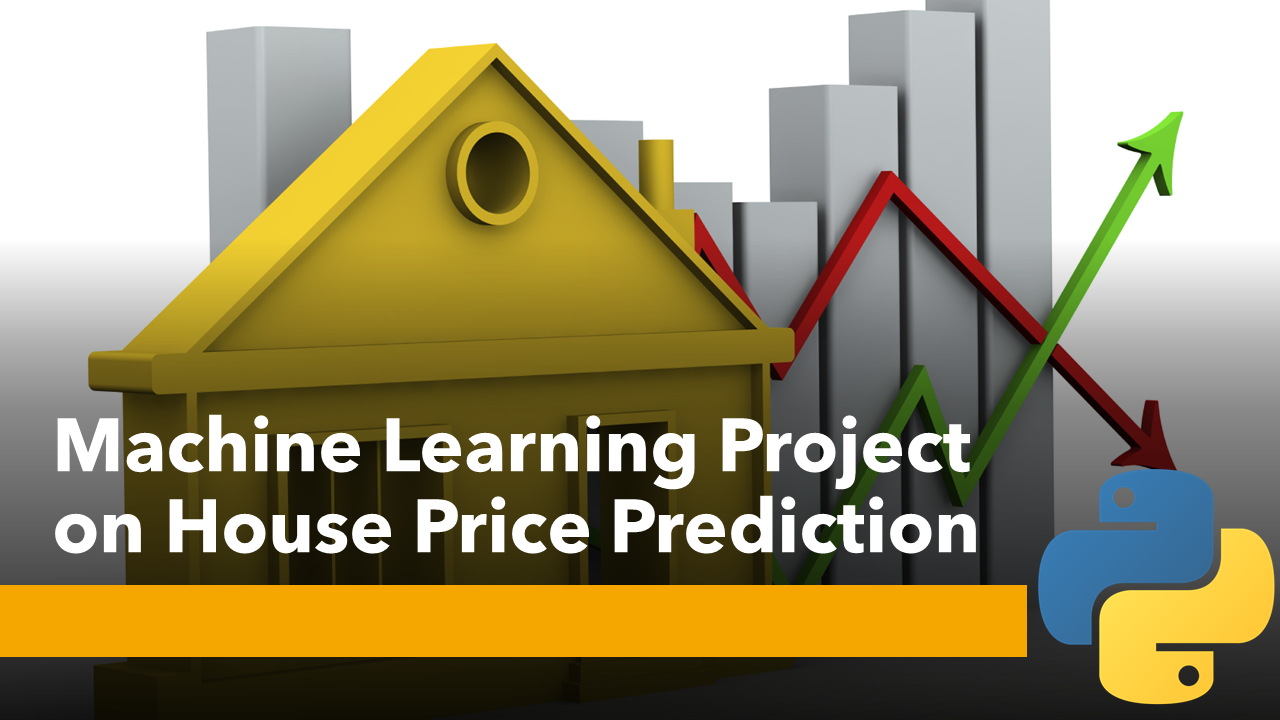

## Dataset Description

This dataset contains information about house prices in various cities. The data includes both numerical and categorical variables that can be used for predicting house prices. The dataset is rich in features, providing details about the area, location, amenities, and furnishings of the houses.

## Data Dictionary

The dataset consists of the following columns:

1. **Price**: The selling price of the house (numerical)
2. **Area**: The area of the house in square feet (numerical)
3. **Location**: The location of the house (categorical)
4. **City**: The city where the house is located (categorical)
5. **No. of Bedrooms**: The number of bedrooms in the house (numerical)
6. **Resale**: Whether the house is a resale property or not (categorical: Yes/No/Not Mentioned)
7. **MaintenanceStaff**: Availability of maintenance staff in the housing society (categorical: Yes/No/Not Mentioned)
8. **Gymnasium**: Availability of a gymnasium in the housing society (categorical: Yes/No/Not Mentioned)
9. **SwimmingPool**: Availability of a swimming pool in the housing society (categorical: Yes/No/Not Mentioned)
10. **LandscapedGardens**: Availability of landscaped gardens in the housing society (categorical: Yes/No/Not Mentioned)
11. **JoggingTrack**: Availability of a jogging track in the housing society (categorical: Yes/No/Not Mentioned)
12. **RainWaterHarvesting**: Availability of rainwater harvesting in the housing society (categorical: Yes/No/Not Mentioned)
13. **IndoorGames**: Availability of indoor games facilities in the housing society (categorical: Yes/No/Not Mentioned)
14. **ShoppingMall**: Availability of a shopping mall near the house (categorical: Yes/No/Not Mentioned)
15. **Intercom**: Availability of an intercom system in the house (categorical: Yes/No/Not Mentioned)
16. **SportsFacility**: Availability of sports facilities in the housing society (categorical: Yes/No/Not Mentioned)
17. **ATM**: Availability of an ATM near the house (categorical: Yes/No/Not Mentioned)
18. **ClubHouse**: Availability of a clubhouse in the housing society (categorical: Yes/No/Not Mentioned)
19. **School**: Availability of a school near the house (categorical: Yes/No/Not Mentioned)
20. **24X7Security**: Availability of 24X7 security in the housing society (categorical: Yes/No/Not Mentioned)
21. **PowerBackup**: Availability of power backup in the house (categorical: Yes/No/Not Mentioned)
22. **CarParking**: Availability of car parking space in the housing society (categorical: Yes/No/Not Mentioned)
23. **StaffQuarter**: Availability of staff quarters in the housing society (categorical: Yes/No/Not Mentioned)
24. **Cafeteria**: Availability of a cafeteria in the housing society (categorical: Yes/No/Not Mentioned)
25. **MultipurposeRoom**: Availability of a multipurpose room in the housing society (categorical: Yes/No/Not Mentioned)
26. **Hospital**: Availability of a hospital near the house (categorical: Yes/No/Not Mentioned)
27. **WashingMachine**: Availability of a washing machine in the house (categorical: Yes/No/Not Mentioned)
28. **Gasconnection**: Availability of a gas connection in the house (categorical: Yes/No/Not Mentioned)
29. **AC**: Availability of air conditioning in the house (categorical: Yes/No/Not Mentioned)
30. **Wifi**: Availability of WiFi in the house (categorical: Yes/No/Not Mentioned)
31. **Children'splayarea**: Availability of a children's play area in the housing society (categorical: Yes/No/Not Mentioned)
32. **LiftAvailable**: Availability of a lift in the housing society (categorical: Yes/No/Not Mentioned)
33. **BED**: Availability of a bed in the house (categorical: Yes/No/Not Mentioned)
34. **VaastuCompliant**: Whether the house is Vaastu compliant or not (categorical: Yes/No/Not Mentioned)
35. **Microwave**: Availability of a microwave in the house (categorical: Yes/No/Not Mentioned)
36. **GolfCourse**: Availability of a golf course in the housing society (categorical: Yes/No/Not Mentioned)
37. **TV**: Availability of a TV in the house (categorical: Yes/No/Not Mentioned)
38. **DiningTable**: Availability of a dining table in the house (categorical: Yes/No/Not Mentioned)
39. **Sofa**: Availability of a sofa in the house (categorical: Yes/No/Not Mentioned)
40. **Wardrobe**: Availability of a wardrobe in the house (categorical: Yes/No/Not Mentioned)
41. **Refrigerator**: Availability of a refrigerator in the house (categorical: Yes/No/Not Mentioned)

## Potential Uses

This dataset can be used for various purposes, including:

- House price prediction: Using machine learning algorithms, the dataset can be used to build a model that can predict house prices based on the given features.
- Market analysis: The dataset can be used to analyze the housing market in different cities by identifying trends and patterns in house prices and amenities offered.
- Real estate investment: The dataset can aid investors in making informed decisions about real estate investment by providing insights on house prices and amenities in different locations.

## Data Source and Acknowledgments

The dataset was collected from various real estate listings and publicly available sources. We would like to acknowledge the contributions of the data providers in creating this dataset.

[Kaggle Dataset](https://www.kaggle.com/datasets/vijayjoshi17/housing-dataset-in-metropolitan-combined-dataset)


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#Importing necessary libraries
import pandas as pd
import numpy as nop
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")


Building a function to:
1. Read a CSV file
2. Remove 9 values in the whole dataset as it does not fit the 1 and 0 OneHotEncoding
3. Remove 'Wifi' and 'Wardrobe' columns because they only contain the value 0
4. Remove 'Price' value hgiher than $100,000,000.00

In [36]:
def wrangle(filename):
    # Read a CSV file
    house_data = pd.read_csv(filename)

    # Removing 9 from the dataset to remain with 0 and 1 as yes or no
    house_data.replace(9, np.nan, inplace=True)
    house_data.dropna(inplace=True)

    # Removing columns 'Wifi' and 'Wardrobe' because they only contain 0 value only
    house_data.drop(columns = ['Wifi', 'Wardrobe'], inplace=True)

    # Removing 'Price' higher than 100000000
    maskprice = house_data["Price"]< 100000000
    house_data = house_data[maskprice]

    return house_data

In [37]:
house_data = wrangle("/content/drive/MyDrive/kaggle data/merged_files.csv")

In [38]:
house_data.columns

Index(['Price', 'Area', 'Location', 'City', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Children'splayarea', 'LiftAvailable', 'BED',
       'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable',
       'Sofa', 'Refrigerator'],
      dtype='object')

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves exploring and summarizing the main characteristics of the dataset to gain insights and a better understanding of the data. EDA helps in uncovering patterns, identifying outliers, assessing the distribution of variables, and exploring relationships between variables.

During EDA, various techniques and visualizations are used to examine the data. This includes:

- Summarizing the data using descriptive statistics such as mean, median, mode, and standard deviation.
- Visualizing data through histograms, box plots, scatter plots, and bar charts.
- Identifying missing values, outliers, and data inconsistencies.
- Analyzing distributions and exploring patterns in the data.
- Investigating relationships between variables through correlation analysis and cross-tabulations.

EDA plays a vital role in providing insights that can guide further analysis, model building, and decision-making. It helps in formulating hypotheses, validating assumptions, and determining the appropriate techniques for data preprocessing, feature engineering, and modeling.

By performing EDA, data scientists can effectively understand the dataset, identify potential issues, and make informed decisions about data cleaning, feature selection, and model development.


In [39]:
#checking shape of the dataset
print(f"given data have {house_data.shape[0]} Rows.")
print(f"given data have {house_data.shape[1]} Columns.")

given data have 10063 Rows.
given data have 39 Columns.


In [40]:
#checking null values in the dataset
house_data.isna().sum()


Price                  0
Area                   0
Location               0
City                   0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Refrigerator           0
dtype: int64

Data have **Zero** `missing/null` values.

In [41]:
#Checking unique value of each columns to check any column have unexpectected entry in it like(-,Naan,?).
for column in house_data.columns:
    print(column, ':', house_data[column].unique())


Price : [30000000  7888000  4866000 ...  8009999  7430000 62000000]
Area : [3340 1045 1179 ...  846 3465 2355]
Location : ['JP Nagar Phase 1' 'Dasarahalli on Tumkur Road'
 'Kannur on Thanisandra Main Road' 'Doddanekundi' 'Kengeri' 'Horamavu'
 'Thanisandra' 'Ramamurthy Nagar' 'Whitefield Hope Farm Junction'
 'Electronic City Phase 1' 'Yelahanka' 'Anjanapura' 'Jalahalli'
 'Kasavanahalli' 'Bommasandra' 'Bellandur' 'RR Nagar' 'Begur' 'Hosa Road'
 'Sahakar Nagar' 'Kadugodi' 'Jakkur' 'Jigani' 'Krishnarajapura'
 'Brookefield' 'Banashankari' 'Nelamangala' 'Attibele' 'Banaswadi'
 'Kodigehalli' 'ITPL' 'Uttarahalli Hobli'
 'Chikkagubbi on Hennur Main Road' 'Varthur' 'Vidyaranyapura'
 'Electronic City Phase 2' 'J. P. Nagar' 'K. Chudahalli' 'Narayanaghatta'
 'Anekal City' 'Sarjapur' 'Koramangala' 'Hebbal' 'Budigere Cross'
 'Bommanahalli' 'Electronics City' 'Chikkalasandra' 'Kogilu'
 'Nayandahalli' 'Bilekahalli' 'Muneshwara Nagar' 'Junnasandra'
 'Narayanapura on Hennur Main Road' 'Kothanur' 'Kadugod

No unexpected character in Given Data.

In [42]:
# checking Datatype of each columns
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10063 entries, 0 to 26641
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                10063 non-null  int64  
 1   Area                 10063 non-null  int64  
 2   Location             10063 non-null  object 
 3   City                 10063 non-null  object 
 4   No. of Bedrooms      10063 non-null  float64
 5   Resale               10063 non-null  int64  
 6   MaintenanceStaff     10063 non-null  float64
 7   Gymnasium            10063 non-null  float64
 8   SwimmingPool         10063 non-null  float64
 9   LandscapedGardens    10063 non-null  float64
 10  JoggingTrack         10063 non-null  float64
 11  RainWaterHarvesting  10063 non-null  float64
 12  IndoorGames          10063 non-null  float64
 13  ShoppingMall         10063 non-null  float64
 14  Intercom             10063 non-null  float64
 15  SportsFacility       10063 non-null 

In [43]:
#checking basic statistics of the dataset
house_data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
count,1.006300e+04,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,...,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000
mean,9.869902e+06,1338.745106,2.454536,0.342244,0.170327,0.520421,0.414091,0.348703,0.333201,0.367187,...,0.513167,0.716586,0.090530,0.298122,0.048395,0.021564,0.055550,0.052569,0.050681,0.050979
std,9.119691e+06,669.491606,0.753904,0.474484,0.375938,0.499608,0.492589,0.476584,0.471381,0.482062,...,0.499851,0.450678,0.286953,0.457456,0.214610,0.145263,0.229062,0.223182,0.219356,0.219965
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+06,932.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.948999e+06,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.170000e+07,1600.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.250000e+07,9400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Summary of Key Findings

- The dataset contains 10,063 records.
- **Price**: The house prices range from 2,000,000 to 92,500,000. The mean price is approximately 9,869,902, with a standard deviation of around 9,119,691. The prices are positively skewed towards higher values, as indicated by the higher mean compared to the median.
- **Area**: The house sizes range from 200 to 9,400 square feet, with a mean of approximately 1,338 square feet. The standard deviation is around 669, indicating a moderate variation in house sizes.
- **No. of Bedrooms**: The number of bedrooms in the houses ranges from 1 to 8, with an average of approximately 2.5 bedrooms per house.
- **Resale**: The dataset contains both resale and non-resale properties. Approximately 34.2% of the houses are resale properties.
- **Amenities**: The availability of various amenities (such as MaintenanceStaff, Gymnasium, SwimmingPool, etc.) is represented by binary values (0 or 1), indicating whether the amenity is present or not. The mean values for these amenities indicate the proportion of houses that have the corresponding amenities available.
- **Furnishings**: Similarly, the availability of furnishings (Microwave, TV, DiningTable, etc.) is represented by binary values. The mean values indicate the proportion of houses that have the respective furnishings.

This summary provides an overview of the dataset, including statistics on house prices, sizes, bedroom counts, resale properties, and the availability of amenities and furnishings. It helps in understanding the overall characteristics of the dataset and provides insights into the distribution and prevalence of these features.


##### Based on the summary provided, it can be inferred that the given dataset **`area`** and  **`No of Bedrooms`**  does have outliers.

### Visualizing outliers in the dataset

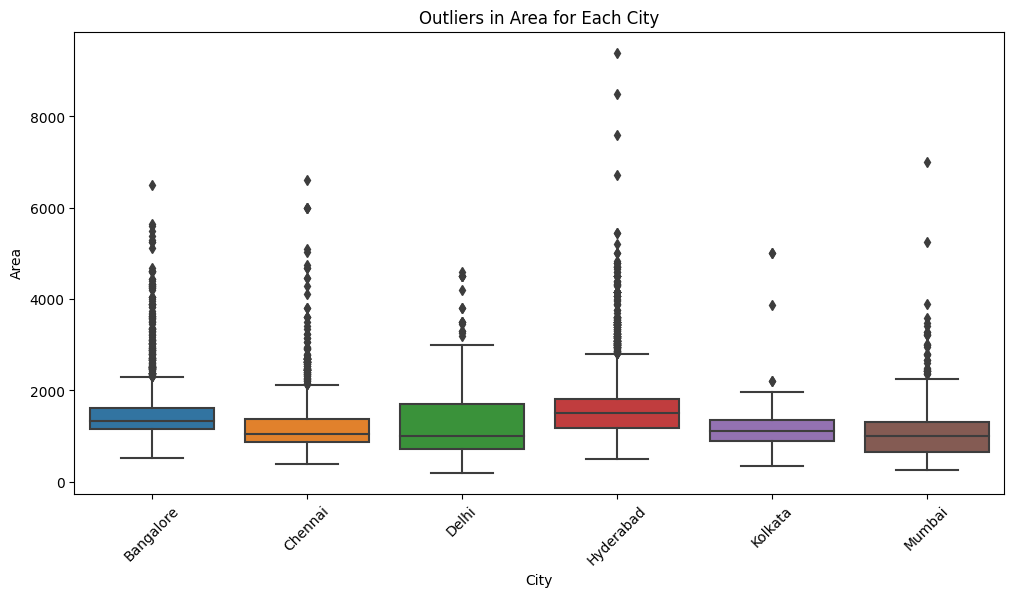

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for outliers in the area for each city
plt.figure(figsize=(12, 6))
sns.boxplot(data=house_data, x='City', y='Area')
plt.title('Outliers in Area for Each City')
plt.xlabel('City')
plt.ylabel('Area')
plt.xticks(rotation=45)
plt.show()


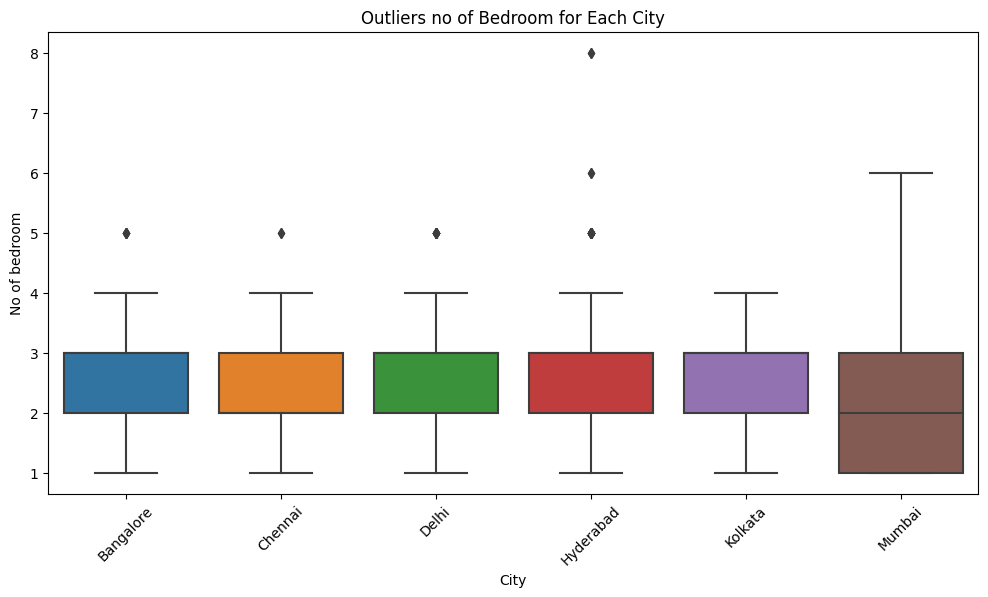

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for outliers in the area for each city
plt.figure(figsize=(12, 6))
sns.boxplot(data=house_data, x='City', y='No. of Bedrooms')
plt.title('Outliers no of Bedroom for Each City')
plt.xlabel('City')
plt.ylabel('No of bedroom')
plt.xticks(rotation=45)
plt.show()


### Outlier Handling

Instead of removing outliers, an alternative approach to handling skewness and outliers in the 'Area' and 'No of Bedrooms' columns is to apply a logarithmic transformation to the data. This transformation can help reduce skewness and mitigate the impact of extreme values.

In [46]:
house_data['Area'] = np.log1p(house_data['Area'])
house_data['No. of Bedrooms'] = np.log1p(house_data['No. of Bedrooms'])

In [47]:
#normalizing so that the price reflects price in lakh (i.e 1/10 of a million)
house_data["Price"] = house_data["Price"].astype("float")
house_data=house_data.assign(Price = house_data['Price'] / 100000)




##### How is the distribution of house prices

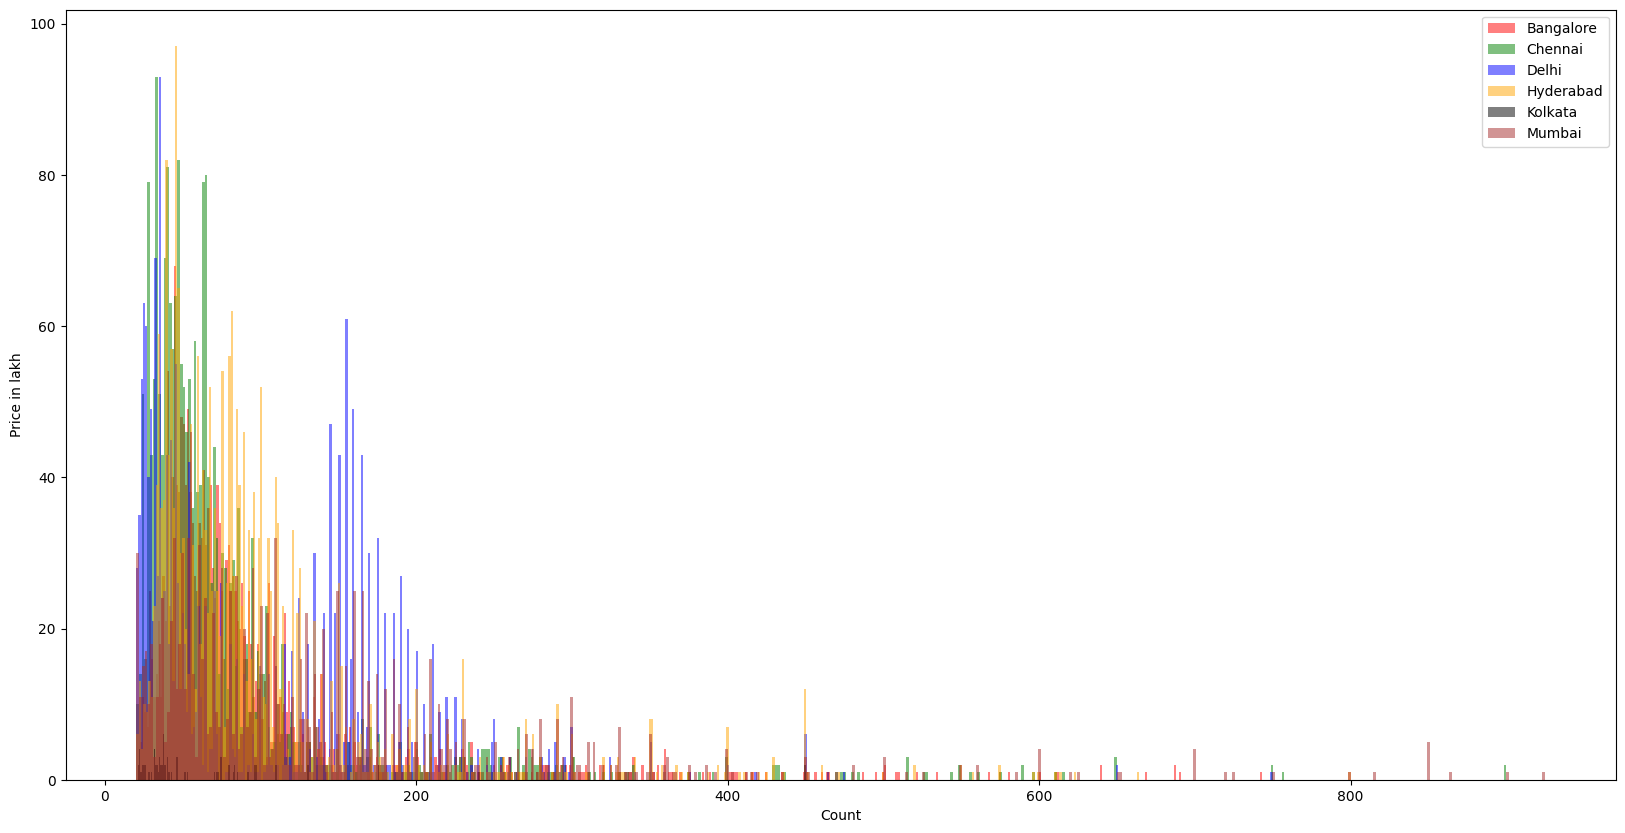

In [48]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b', 'orange', 'black', 'brown']
unique_cities = house_data['City'].unique()

plt.figure(figsize=(20, 10))

for color, city in zip(colors, unique_cities):
    temp_df = house_data[house_data['City'] == city]
    plt.hist(temp_df['Price'], color=color, label=city, bins=500, alpha=0.5)

plt.ylabel('Price in lakh')
plt.xlabel('Count')
plt.legend()
plt.show()


The distribution of house prices in each city is positively skewed towards higher values.

#### Checking the correlation of 'Price' column in comparison with other columns
Using:

1. Statistical representation
2. Using a heatmap for graphical presentation
3. Using Pearson correlation of the noted columns
4. Using a Scatterplot to see the relationship

In [49]:
# Using a Statistical representation

corr_df = house_data.corr()

In [50]:
house_data.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
Price,1.000000,0.650070,0.482222,0.187513,0.126891,0.191681,0.199494,0.167906,0.152136,0.183175,...,0.211009,0.108987,0.131728,0.103966,0.131132,0.091358,0.142350,0.121266,0.130850,0.133444
Area,0.650070,1.000000,0.764820,-0.039624,-0.043686,0.319382,0.356633,0.273736,0.286480,0.229163,...,0.380157,0.151446,0.010970,0.174103,0.139870,0.069122,0.096965,0.115637,0.118783,0.110519
No. of Bedrooms,0.482222,0.764820,1.000000,-0.020039,-0.124927,0.123314,0.171776,0.112707,0.123794,0.054726,...,0.182908,0.098258,-0.033684,0.071207,0.089569,0.018567,0.065798,0.076771,0.067931,0.071401
Resale,0.187513,-0.039624,-0.020039,1.000000,0.263754,-0.153162,-0.226270,-0.137973,-0.173092,-0.015899,...,-0.154351,0.011191,0.184100,0.008822,-0.022128,-0.050852,0.013429,-0.015999,0.019532,-0.013875
MaintenanceStaff,0.126891,-0.043686,-0.124927,0.263754,1.000000,0.138633,0.069364,0.192106,0.165944,0.323359,...,0.030375,0.127156,0.229242,0.220189,-0.013488,0.143842,0.021682,-0.022628,-0.011891,-0.016078
Gymnasium,0.191681,0.319382,0.123314,-0.153162,0.138633,1.000000,0.758966,0.580113,0.632592,0.481995,...,0.720137,0.371755,0.127482,0.366897,0.109889,0.139773,0.071284,0.120948,0.138372,0.106734
SwimmingPool,0.199494,0.356633,0.171776,-0.226270,0.069364,0.758966,1.000000,0.631184,0.690624,0.528577,...,0.669081,0.317845,0.009677,0.425928,0.145095,0.168257,0.092064,0.153632,0.158950,0.139942
LandscapedGardens,0.167906,0.273736,0.112707,-0.137973,0.192106,0.580113,0.631184,1.000000,0.682960,0.586823,...,0.552069,0.276933,0.012595,0.444865,0.078883,0.181357,0.041035,0.087397,0.104727,0.083536
JoggingTrack,0.152136,0.286480,0.123794,-0.173092,0.165944,0.632592,0.690624,0.682960,1.000000,0.613541,...,0.580539,0.251353,-0.035669,0.538499,0.071452,0.194047,0.036579,0.066823,0.070229,0.070994
RainWaterHarvesting,0.183175,0.229163,0.054726,-0.015899,0.323359,0.481995,0.528577,0.586823,0.613541,1.000000,...,0.454045,0.287379,-0.019044,0.557233,0.033795,0.149476,0.050170,0.036727,0.045804,0.042770


<Axes: >

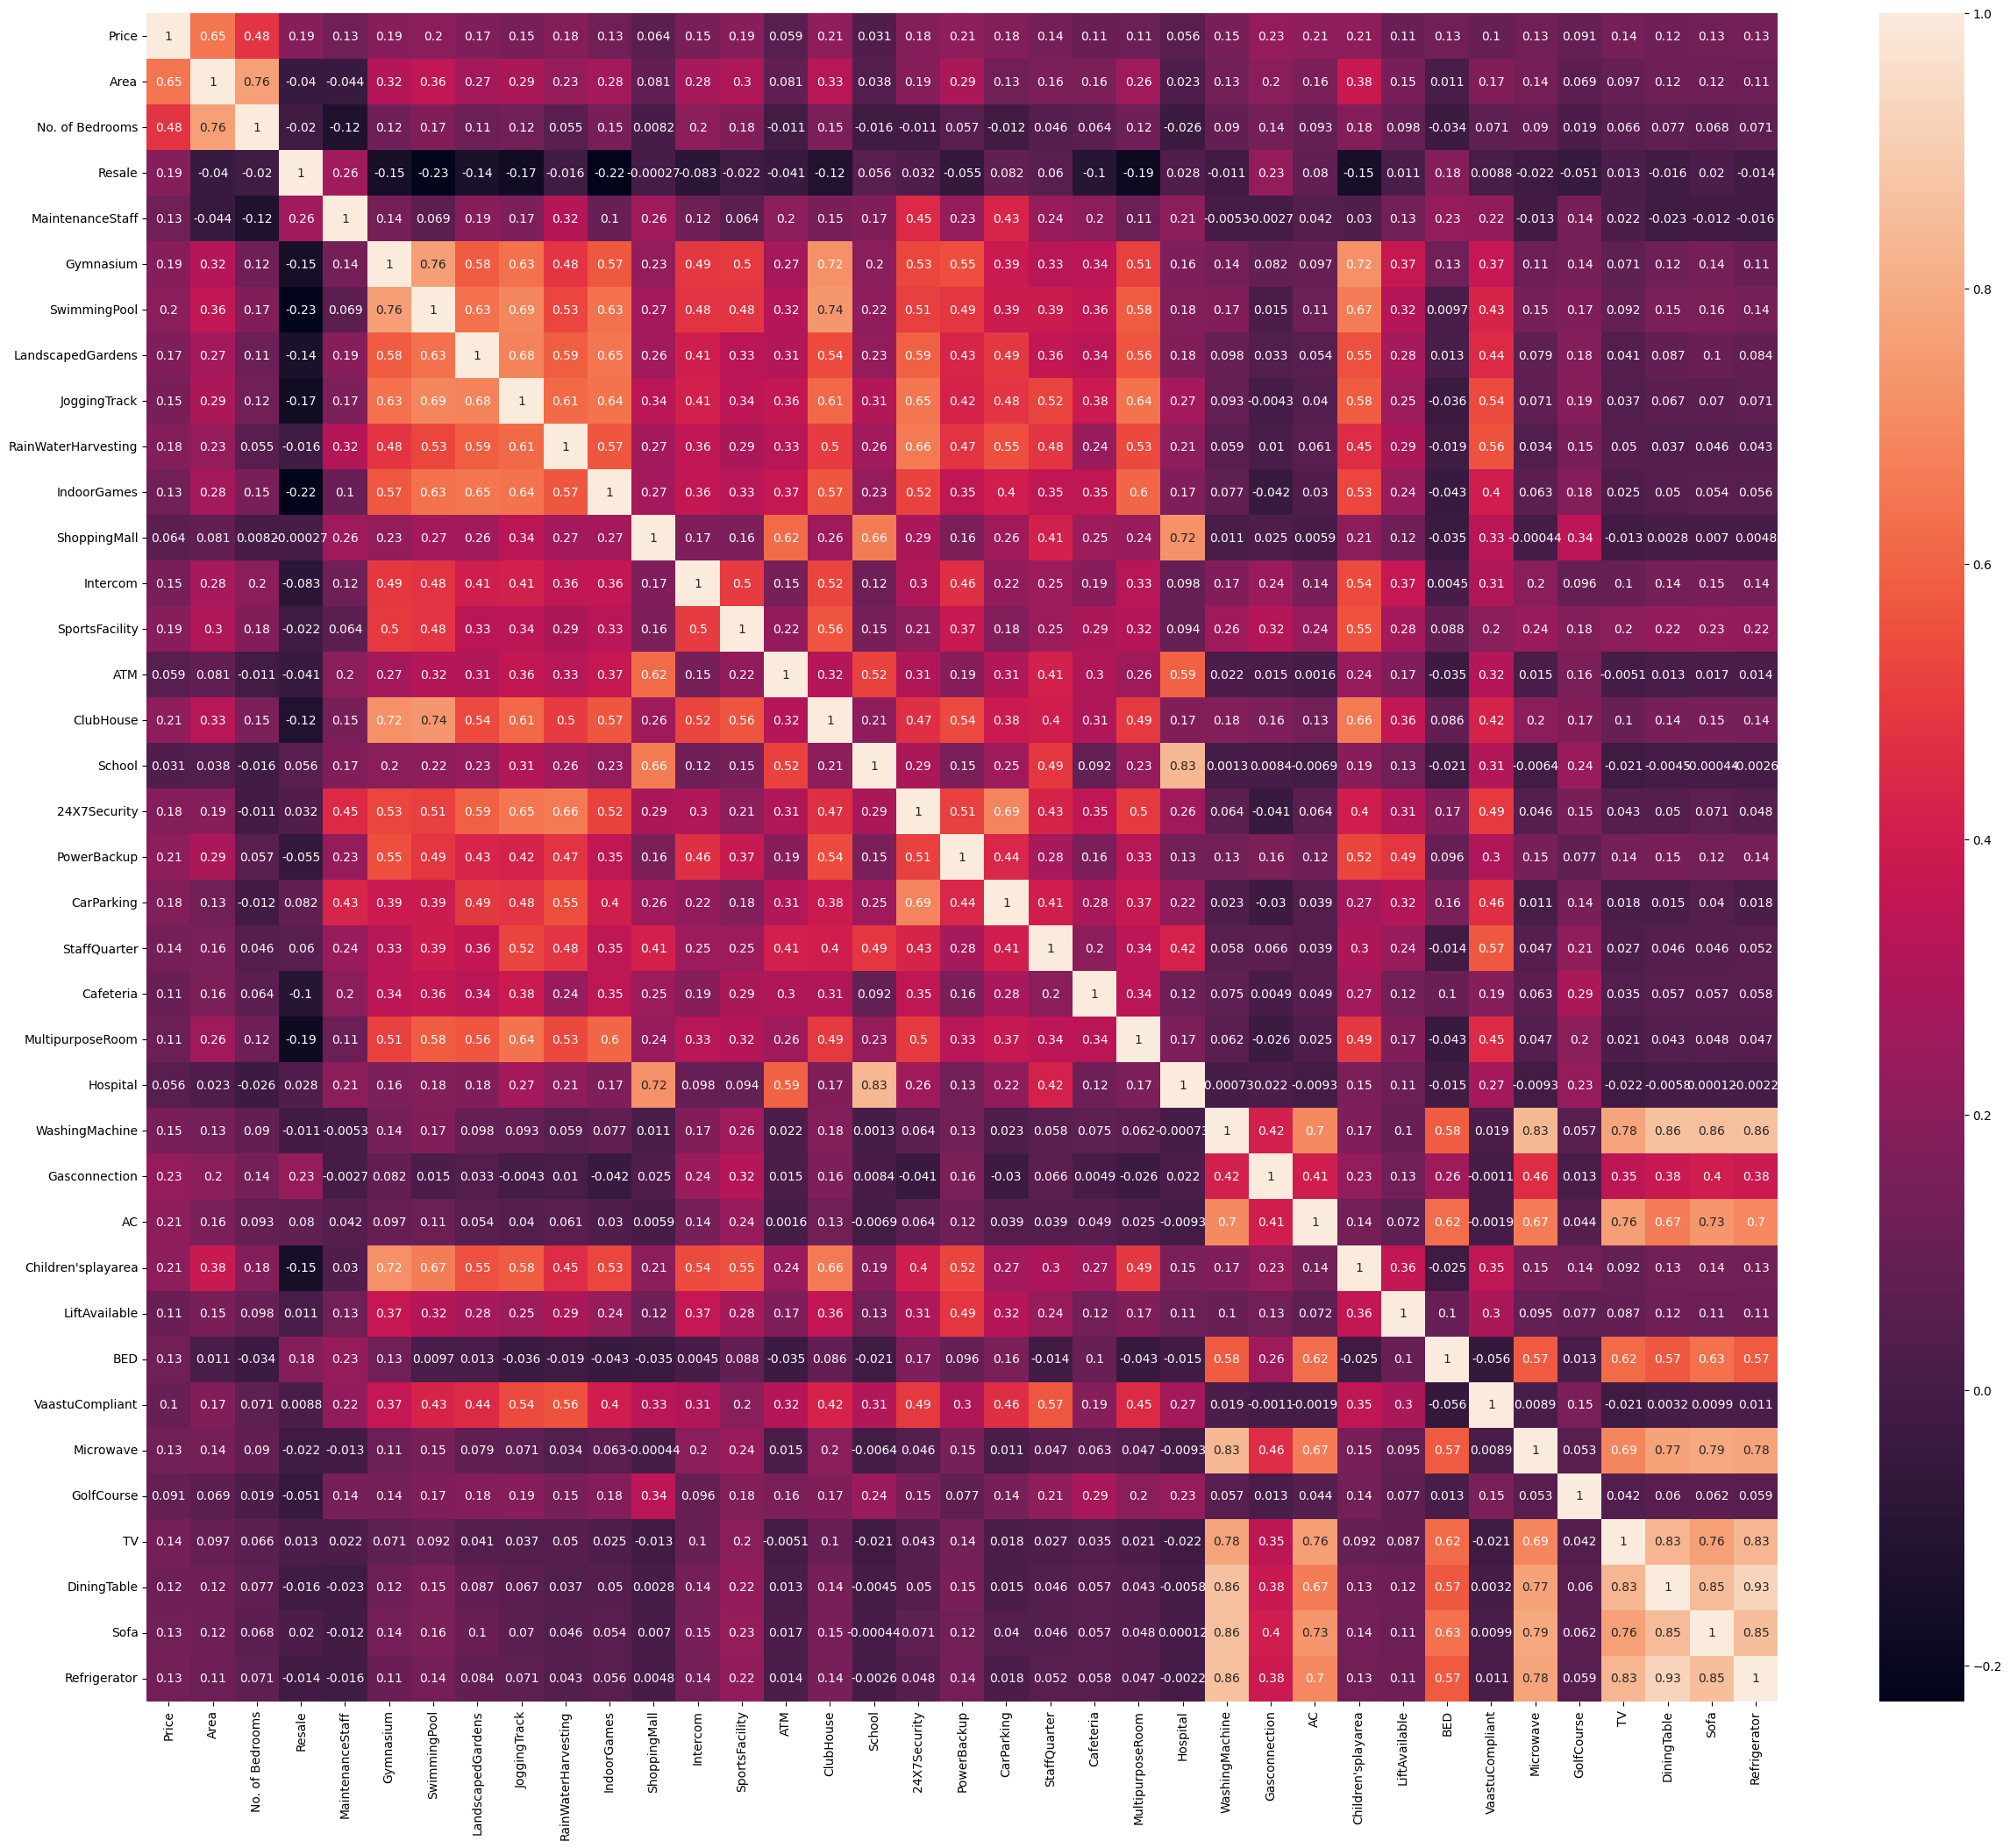

In [51]:
# Using a heatmap
# Removing categorical data from the dataframe first

heatmap_df = house_data.select_dtypes(exclude='object')

plt.figure(figsize= (30,25))
sns.heatmap(heatmap_df.corr(), annot=True)

In [52]:
print(corr_df['Price'].sort_values(ascending=False))

Price                  1.000000
Area                   0.650070
No. of Bedrooms        0.482222
Gasconnection          0.233245
AC                     0.212920
ClubHouse              0.211789
Children'splayarea     0.211009
PowerBackup            0.210055
SwimmingPool           0.199494
SportsFacility         0.192910
Gymnasium              0.191681
Resale                 0.187513
24X7Security           0.183890
RainWaterHarvesting    0.183175
CarParking             0.179205
LandscapedGardens      0.167906
JoggingTrack           0.152136
Intercom               0.150354
WashingMachine         0.148614
TV                     0.142350
StaffQuarter           0.140538
Refrigerator           0.133444
BED                    0.131728
Microwave              0.131132
Sofa                   0.130850
IndoorGames            0.129390
MaintenanceStaff       0.126891
DiningTable            0.121266
MultipurposeRoom       0.112859
LiftAvailable          0.108987
Cafeteria              0.105554
VaastuCo

In [53]:
# Comparing 'Price' with 'Area' using Pearson correlation because they have a correlation of 0.63

pearsonr(house_data['Price'], house_data['Area'])

PearsonRResult(statistic=0.650070105311104, pvalue=0.0)

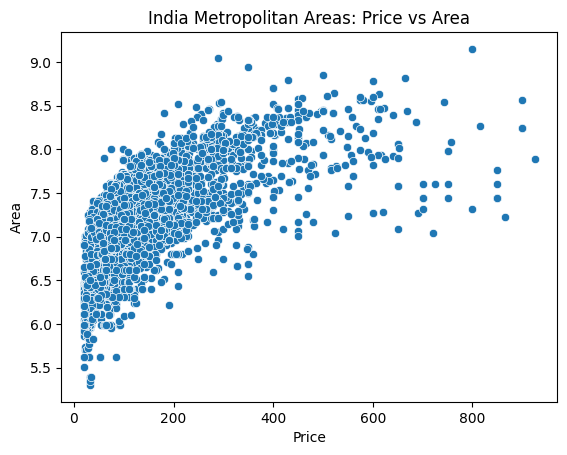

In [54]:
# Using a scatterplot to see the positive relationship
sns.scatterplot(x=house_data['Price'], y=house_data['Area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('India Metropolitan Areas: Price vs Area');

##### What is the Distribution(geographical and according to Number of Rooms) of house prices?

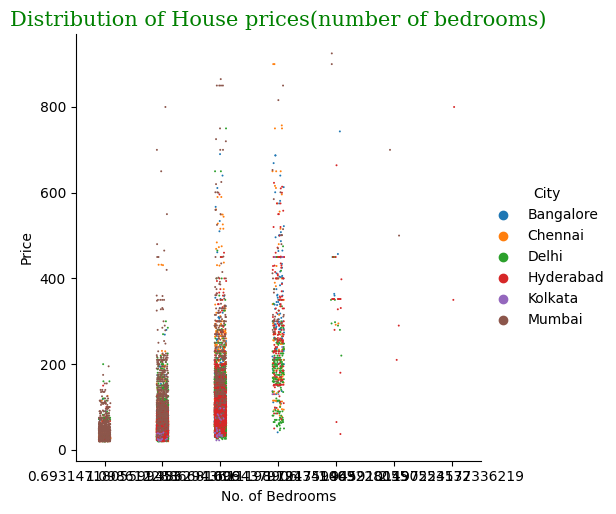

In [55]:

sns.catplot(x='No. of Bedrooms',
            y="Price",
            hue='City',
          data=house_data,s=2)
plt.title("Distribution of House prices(number of bedrooms)",font="Serif", size=15,color='g')
plt.show()

In Mumbai, houses typically have a smaller number of bedrooms.

##### What is the Distribution(city and according to house area) of house prices?

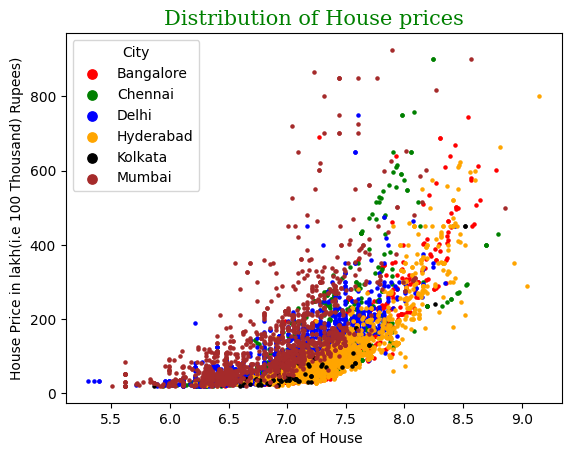

In [56]:
for color,city in zip(['r','g','b','orange','black','brown'],house_data.City.unique()):
    temp_df = house_data[house_data['City']==city]
    x, y = temp_df['Area'],temp_df['Price']
    plt.scatter(x,y,color=color,s=5,label=city)

plt.xlabel('Area of House')
plt.ylabel('House Price in lakh(i.e 100 Thousand) Rupees)')
plt.title("Distribution of House prices",font="Serif", size=15,color='g')
plt.legend(markerscale=3,title='City')
plt.show()

In Mumbai and Hyderabad, houses typically have a smaller Area

### How do amenities affect how prices ?

###### Calculating the principal components of the amenities columns to answer this question.

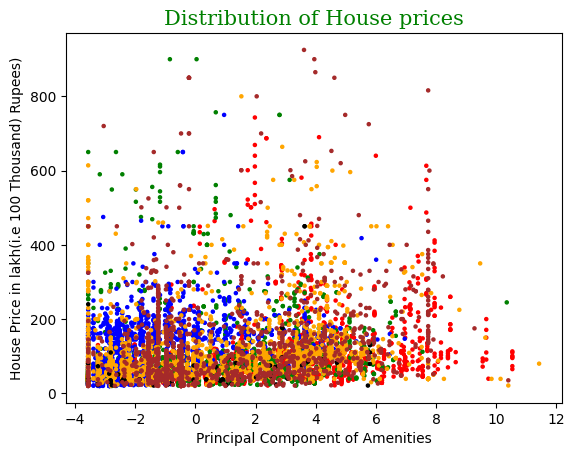

In [57]:
pca_pipeline = Pipeline(steps = [('standard_scaler',StandardScaler()),
                                 ('pca',PCA(n_components=2))
                                 ]
                       )



amenities_cols = ['MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', "Children'splayarea", 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Refrigerator']


amenities_pc = pd.DataFrame(pca_pipeline.fit_transform(house_data[amenities_cols]),
                            columns = [f'dim{i}' for i in range(1,3)])

price = house_data.Price.values
amenities_pc['price'] = price

#city
amenities_pc['city'] = house_data['City'].values


color_map_1 = dict(zip(amenities_pc.city.unique(),['r','g','b','orange','black','brown']))
amenities_pc['color'] = amenities_pc['city'].map(color_map_1)

plt.scatter(amenities_pc['dim1'],amenities_pc['price'],color=amenities_pc['color'],s=5)

plt.xlabel('Principal Component of Amenities')
plt.ylabel('House Price in lakh(i.e 100 Thousand) Rupees)')
plt.title("Distribution of House prices",font="Serif", size=15,color='g')
plt.show()

##### No. of house for resale in each city(location wise)?

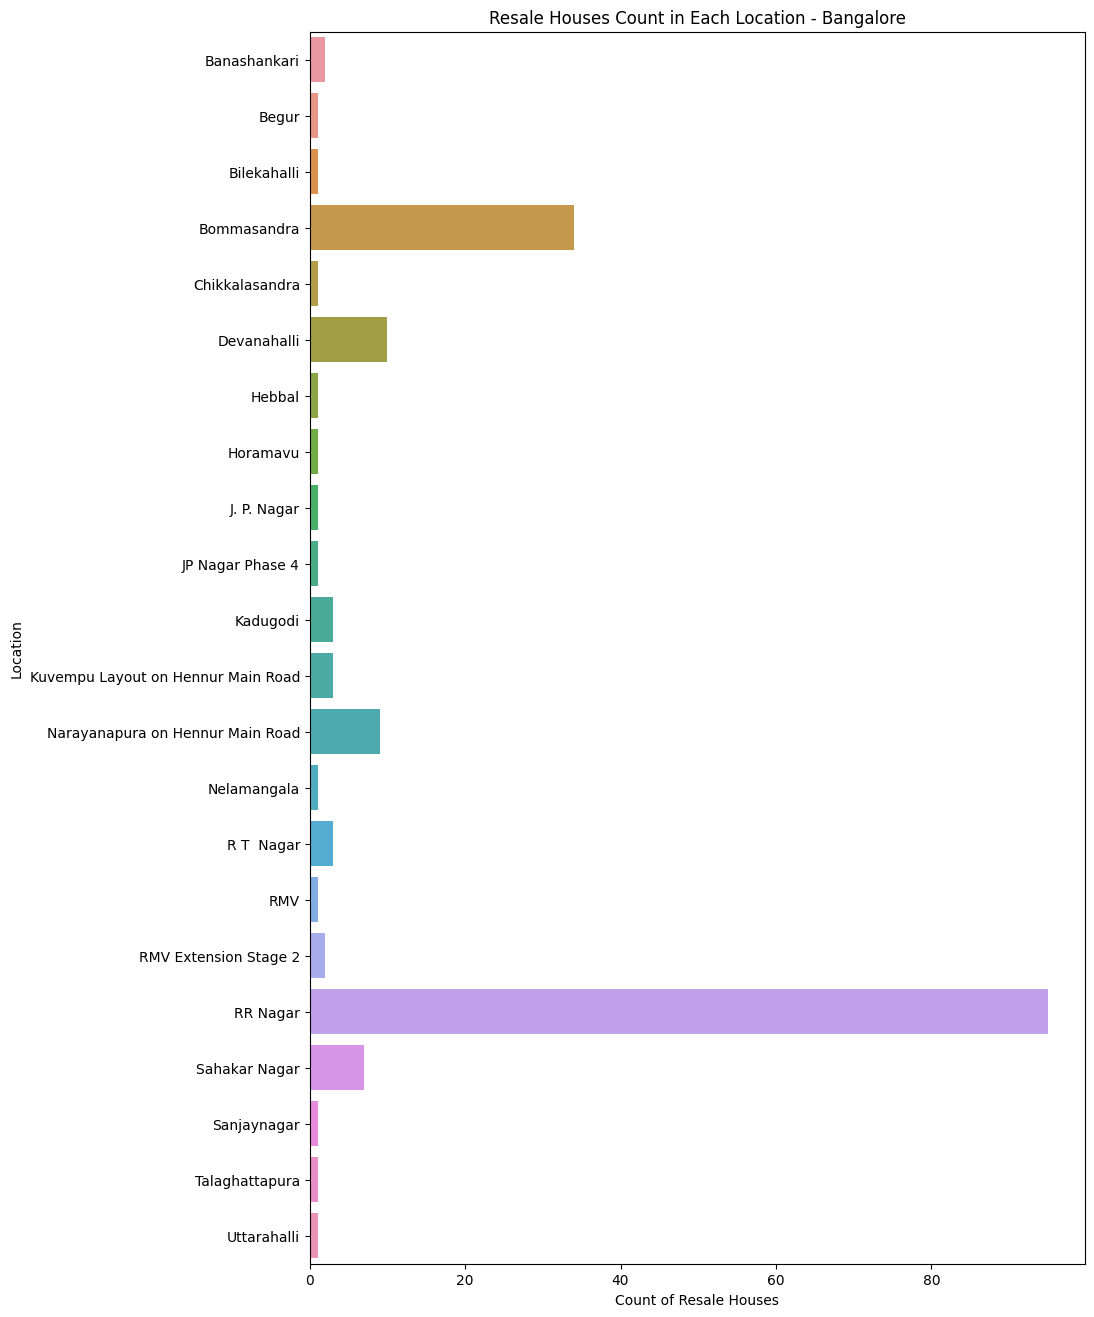

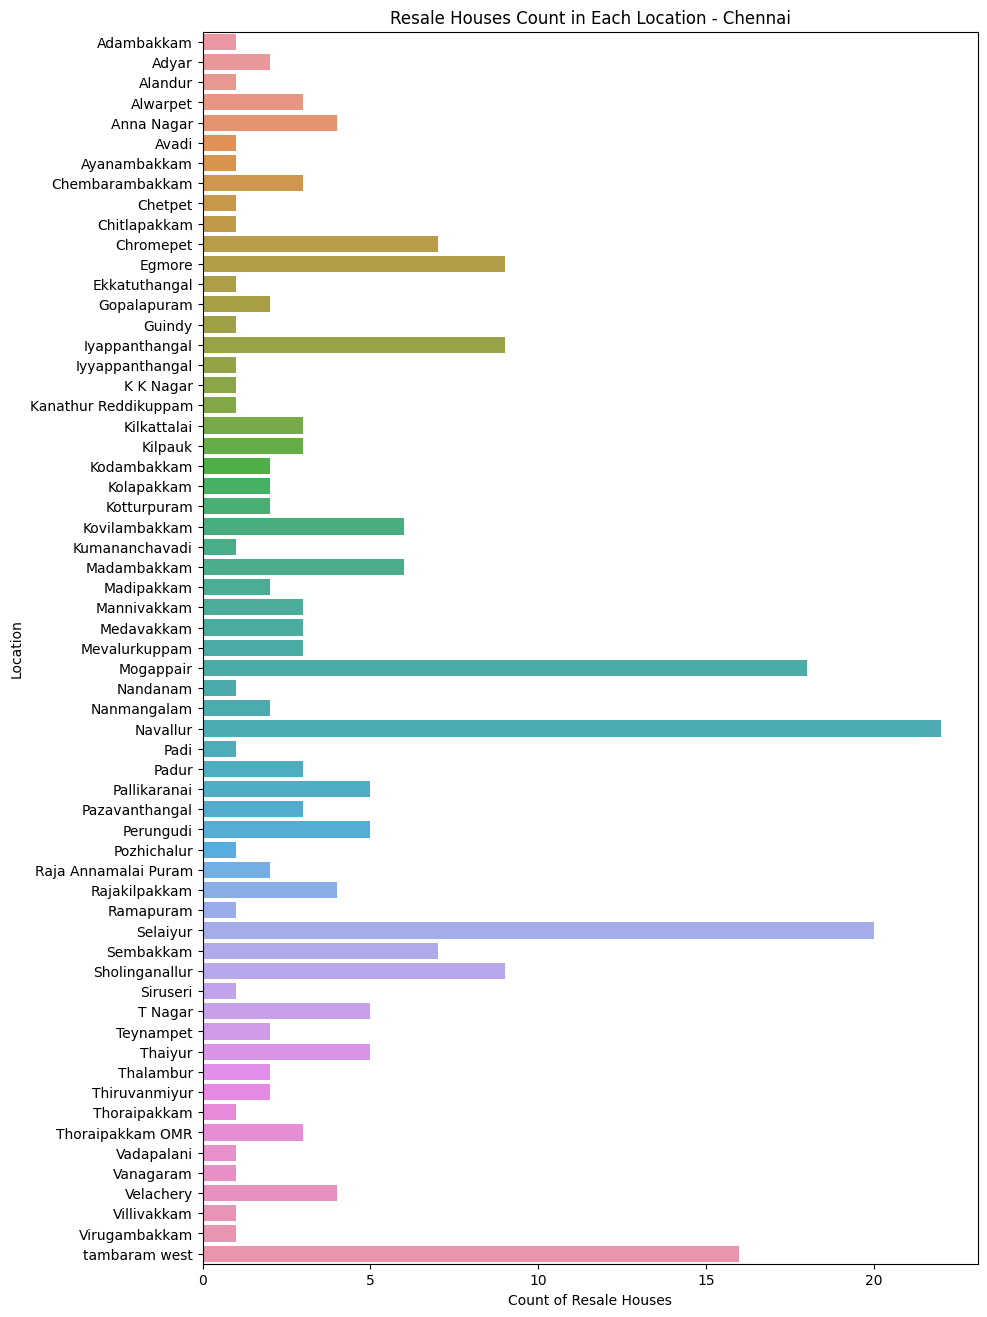

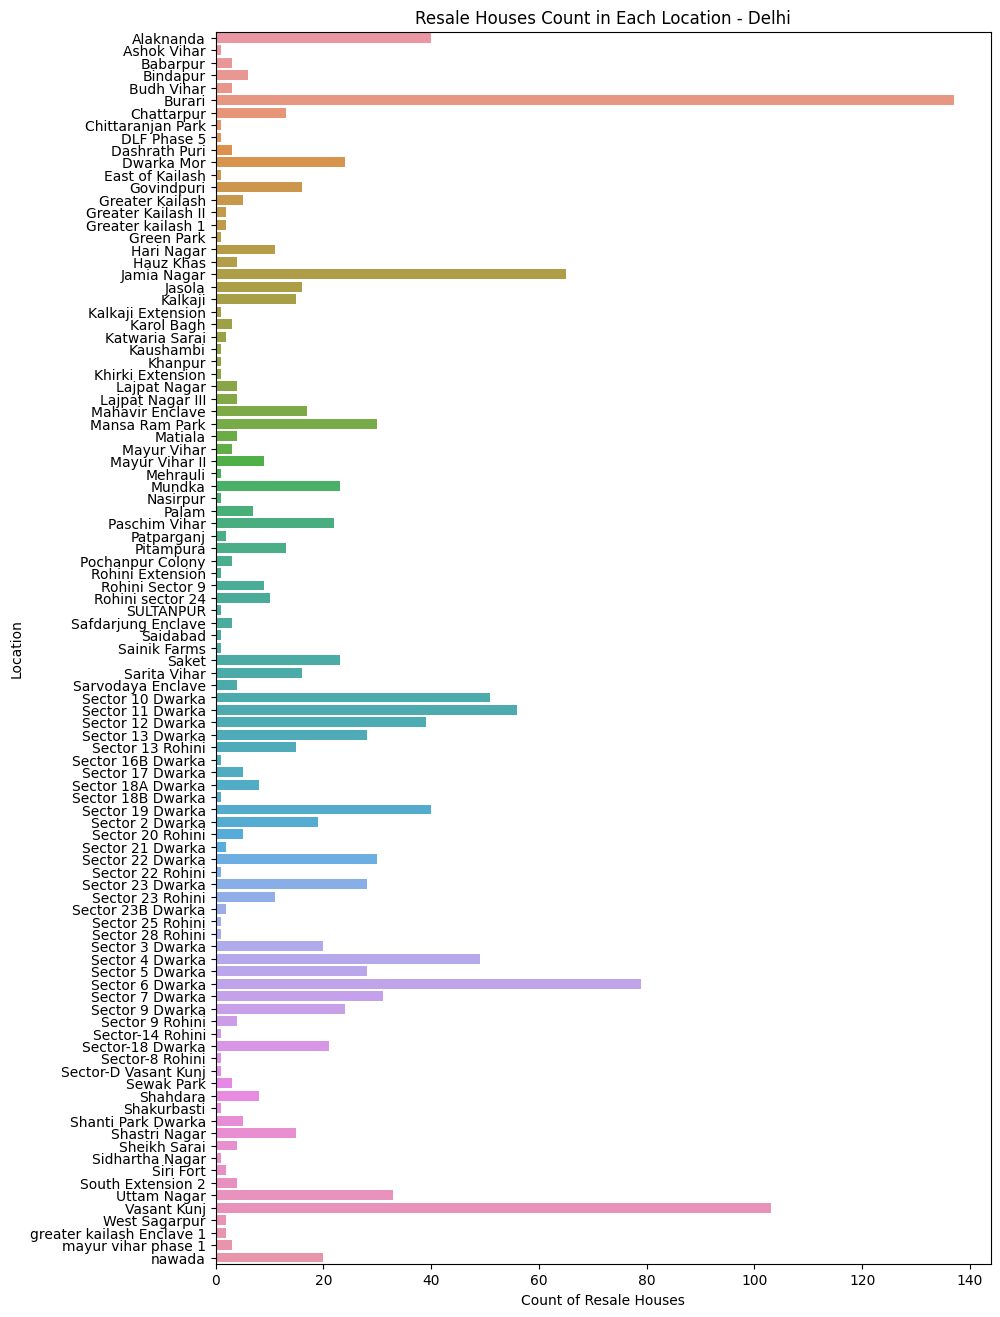

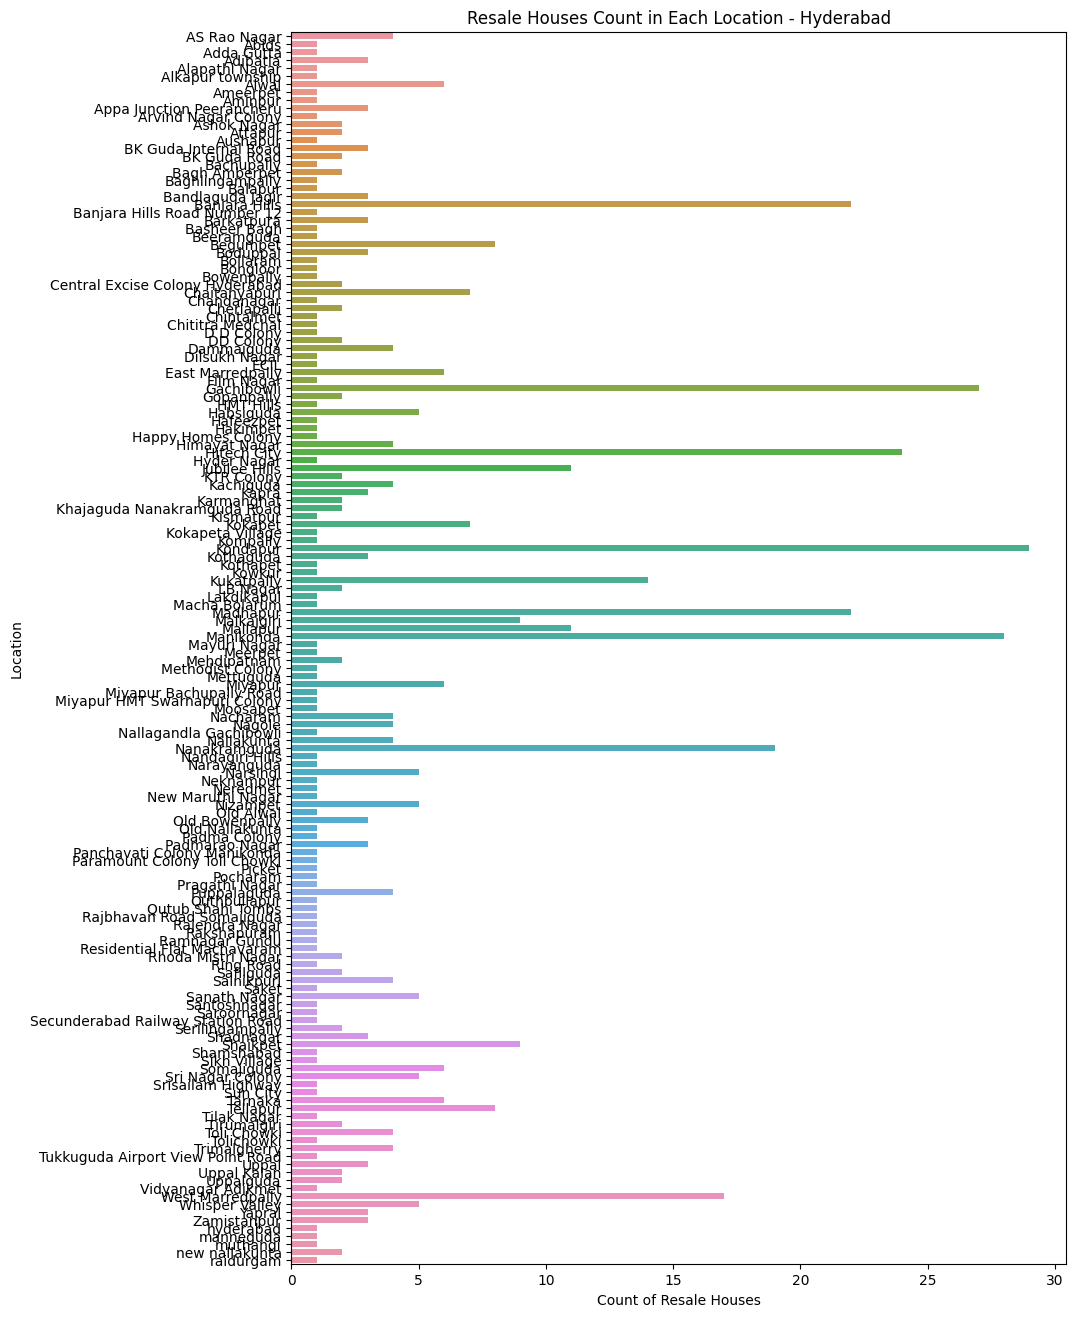

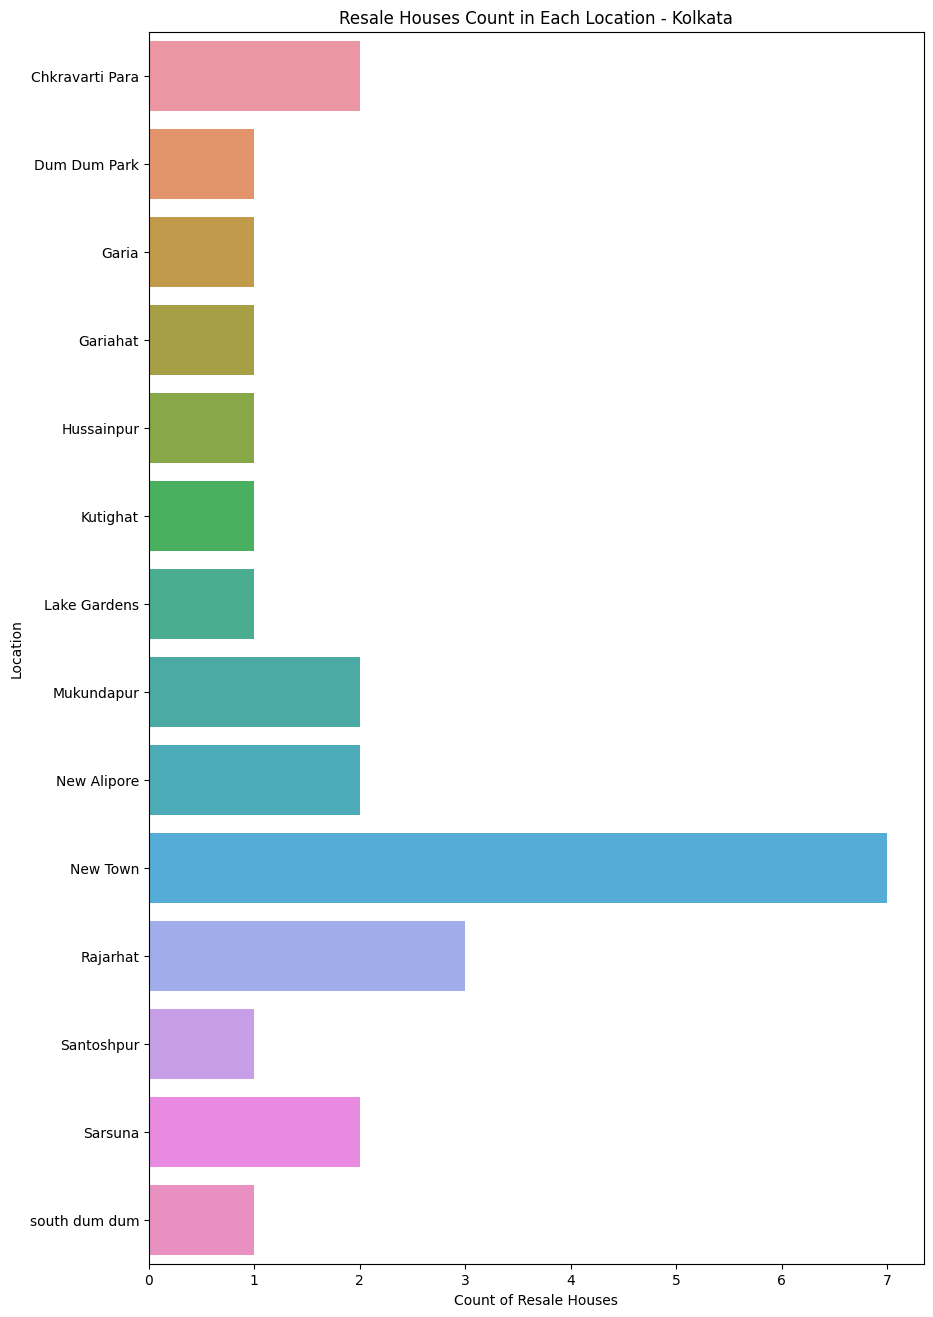

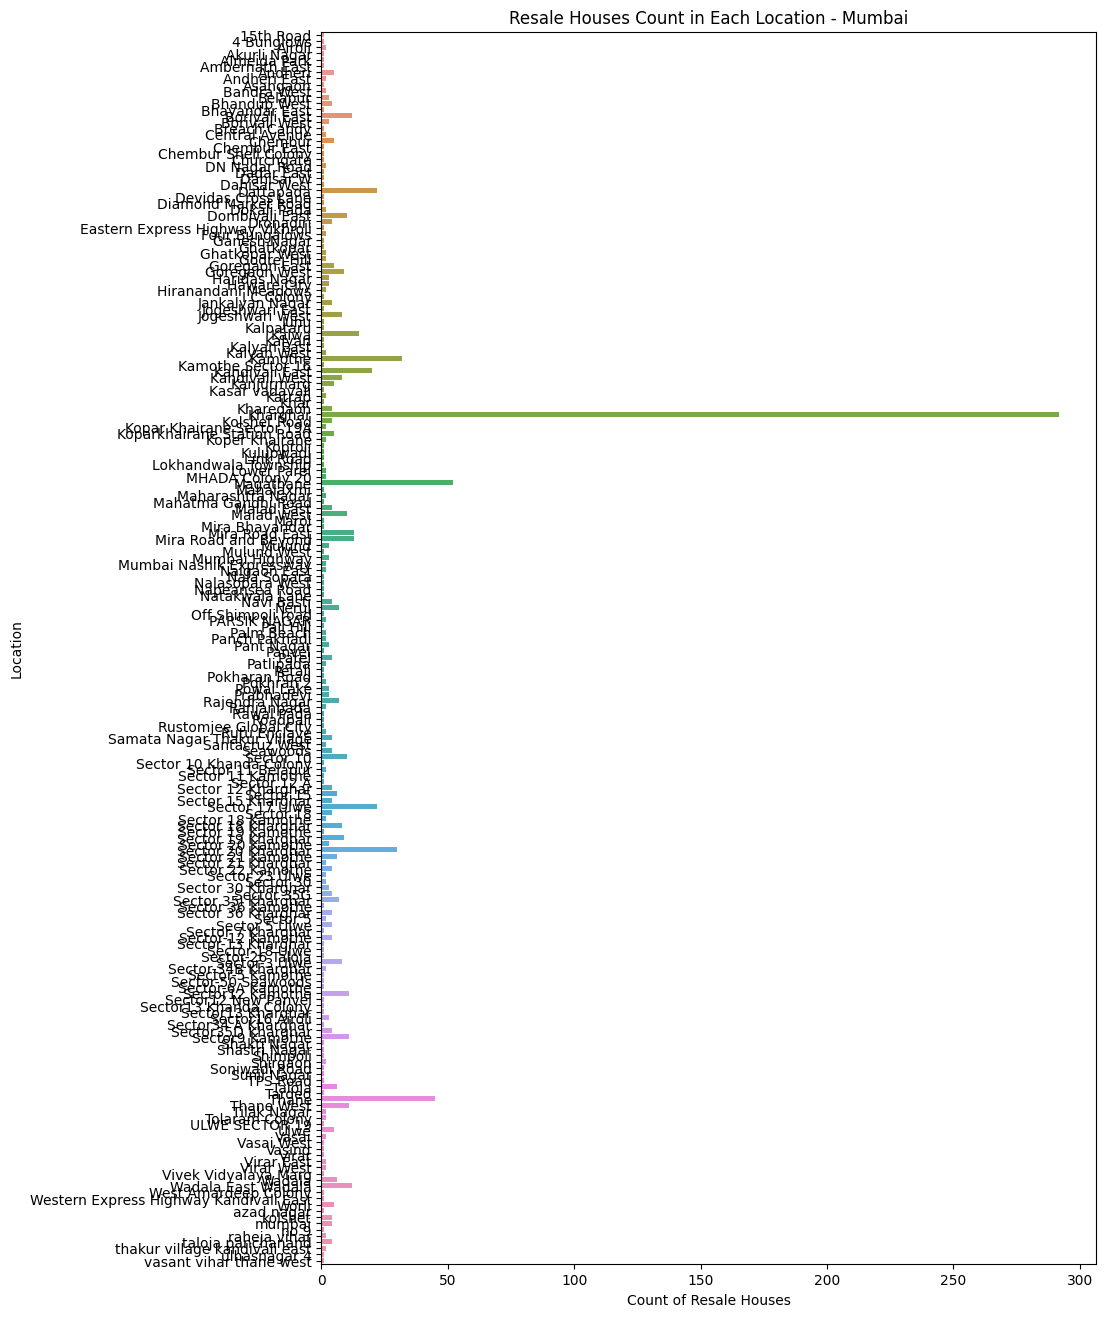

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by city and location, and count the number of resale houses
resale_counts = house_data[house_data['Resale'] == 1].groupby(['City', 'Location']).size().reset_index(name='Count')

# Plot countplot for each city
for city in resale_counts['City'].unique():
    city_data = resale_counts[resale_counts['City'] == city]
    plt.figure(figsize=(10, 16))
    sns.barplot(data=city_data, y='Location', x='Count')
    plt.ylabel('Location')
    plt.xlabel('Count of Resale Houses')
    plt.title(f'Resale Houses Count in Each Location - {city}')
    plt.show()


## Feature Importance

In [60]:
encoder = LabelEncoder()

# Fit the encoder to the data and transform the categories into numerical labels
house_data["City"] = encoder.fit_transform(house_data["City"])

In [61]:
features = house_data.drop(['Price', 'Location'], axis=1)
label = house_data['Price']
features.shape, label.shape

((10063, 37), (10063,))

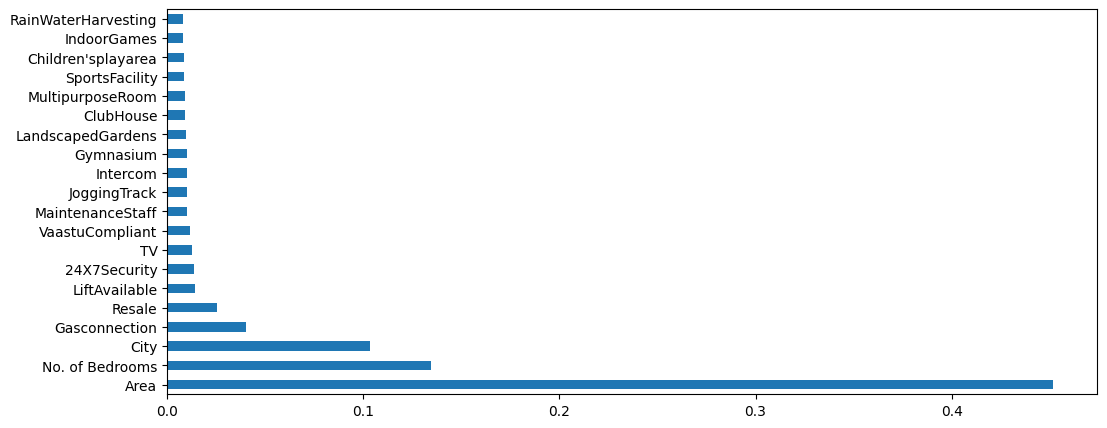

In [62]:
plt.figure(figsize=(12,5))
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(features, label)
feature_importance = pd.Series(etr.feature_importances_, index=features.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

Correlation matrix shows Area, No. of Bedrooms, Resale, LiftAvailable, Gasconnection are importance have good correlation with label and are important features.

## One Hot Encoding

In [63]:
house_data = pd.get_dummies(house_data,drop_first = True)
house_data.shape

(10063, 883)

## Data validation

Data validation involves assessing the quality, reliability, and suitability of data for a particular task or analysis. Splitting the dataset into training and testing subsets is an essential step in assessing the performance and generalization ability of a machine learning model.

In [64]:
features = ['MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','JoggingTrack','RainWaterHarvesting',
            'IndoorGames','ShoppingMall','Intercom','SportsFacility','ATM','ClubHouse','School','24X7Security',
            'PowerBackup','CarParking','StaffQuarter','Cafeteria','MultipurposeRoom','Hospital','WashingMachine',
            'AC','BED','VaastuCompliant','Microwave','GolfCourse','TV','DiningTable',
            'Sofa','Refrigerator']
selected_features = house_data.drop(house_data[features], axis=1)

X_train, X_test, y_train, y_test = train_test_split(selected_features, label, test_size=0.3, random_state=40)


In [65]:


# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7044, 853)
X_test shape: (3019, 853)
y_train shape: (7044,)
y_test shape: (3019,)


# Model Building And Prediction

## linear Regression



In [66]:

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred)
print("R-squared:", r2_lr)


R-squared: 0.9999999999944068


In [67]:
## Decission Tree Regression

In [68]:

# Create an instance of the decision tree regressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Evaluate the model
r2_Dt = r2_score(y_test, y_pred)
print(r2_Dt)

Mean Squared Error: 0.6193675274616429
0.9999301839573058


### Defining parameters for hyperparameter tuning

In [69]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#Number of features to consider in every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

#### Random Grid

In [70]:

random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

## Random Forest Regression

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest_model = RandomizedSearchCV(estimator=random_forest, param_distributions=random_grid, n_jobs=1, random_state=42,
                                        cv=5, n_iter=10, verbose=2, scoring='neg_mean_squared_error')
random_forest_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
y_pred = random_forest_model.predict(X_test)
y_pred

array([190.06630462,  81.00215935,  65.72169128, ...,  65.01605787,
        32.00029784, 349.75917418])

In [74]:
from sklearn.metrics import r2_score
r2_score(y_train, random_forest_model.predict(X_train))

0.9996525239864716

<function matplotlib.pyplot.show(close=None, block=None)>

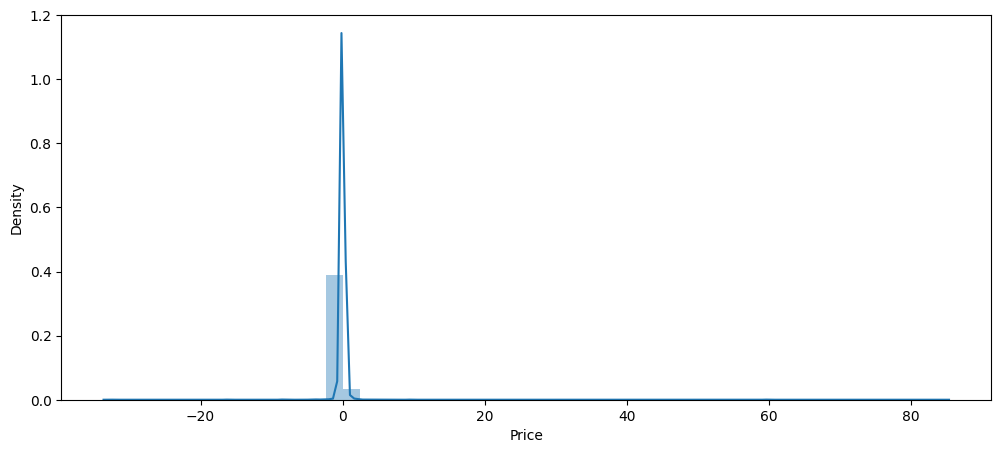

In [75]:
plt.figure(figsize=(12,5))
sns.distplot(y_train-random_forest_model.predict(X_train))
plt.show

In [76]:
r2_score(y_test, random_forest_model.predict(X_test))

0.9997782448988453

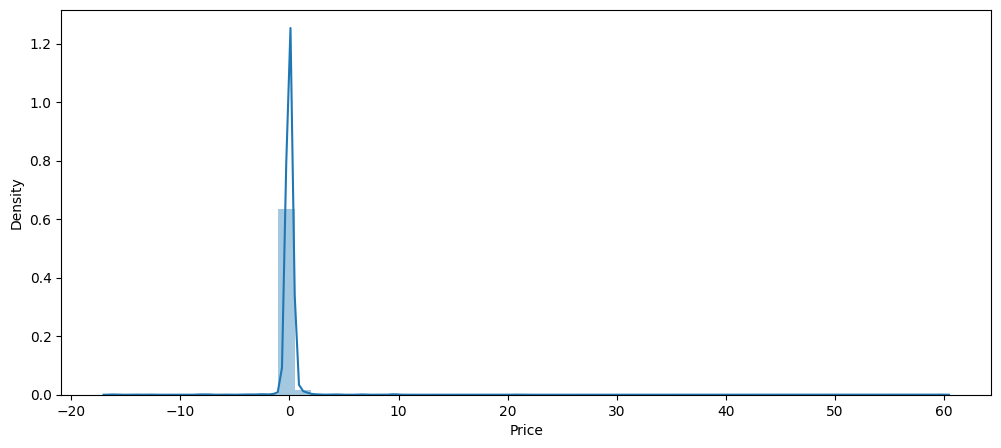

In [77]:
plt.figure(figsize=(12,5))
sns.distplot(y_test-random_forest_model.predict(X_test))
plt.show()

In [87]:
df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [88]:
df

,y_test,y_pred
11419,190.00000,190.066305
17115,81.00000,81.002159
8148,65.70999,65.721691
12656,37.50000,37.511522
7569,27.25000,27.252698
...,...,...
16890,58.00000,58.001933
17237,35.00000,35.001016
16999,65.00000,65.016058
12611,32.00000,32.000298


<Axes: xlabel='y_test', ylabel='y_pred'>

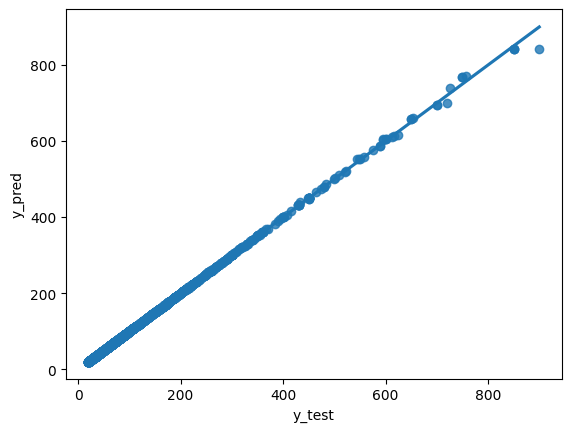

In [101]:
import seaborn as sns

# Assuming you have a DataFrame named 'df' with x and y variables
sns.regplot(x='y_test', y='y_pred', data=df)


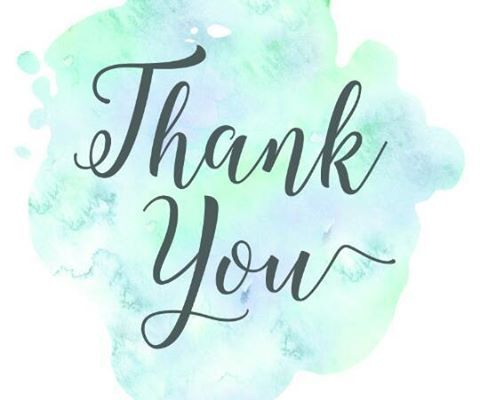